In [1]:
import torch
from Define_Model.ResNet import LocalResNet
from Define_Model.Loss.SoftmaxLoss import AdditiveMarginLinear
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import Process_Data.constants as c

%matplotlib inline

/home/yangwenhao/local/project/SpeakerVerification-pytorch/Define_Model/Loss/SoftmaxLoss.py:152: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  nn.init.xavier_normal(self.W, gain=1)


clean: w:  1.4046464  b:  -1.1549968
aug: w:  1.9652007  b:  -1.9945041
mel: w:  2.2718039  b:  -1.8156908
vox2: w:  2.0387144  b:  -1.9336145


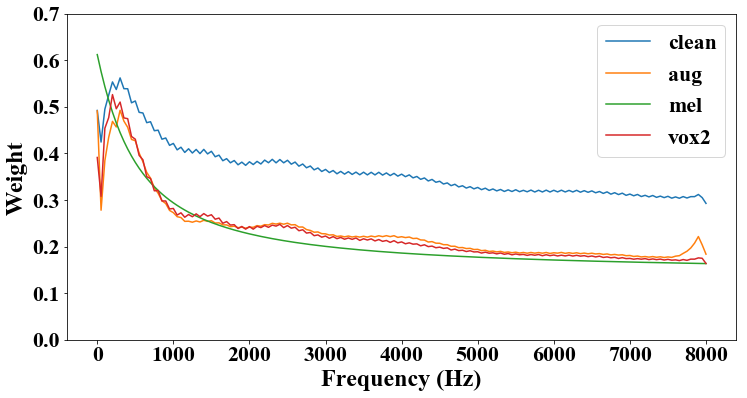

In [2]:
x = np.arange(161) * 8000 / (161 - 1)
plt.figure(figsize=(12, 6))
plt.rc('font', family='Times New Roman')
plt.xlabel('Frequency (Hz)', fontsize=24)
plt.xticks(fontsize=22)
plt.ylabel('Weight', fontsize=24)
plt.yticks(fontsize=22)
    
for weight in ["clean", "aug", "mel", "vox2"]:
    c_model = LocalResNet(embedding_size=256, num_classes=1211, block_type='cbam',
                     input_dim=161, input_len=300, gain_layer=False, init_weight=weight,
                     relu_type='relu', resnet_size=8, channels=[32, 64, 128], dropout_p=0.25, encoder_type='None',
                     input_norm='Mean', alpha=0, stride=2, transform=False, time_dim=1, fast='None',
                     avg_size=4, kernal_size=5, padding=2, filter=None, mask='attention', mask_len=25,)

    c_model.classifier = AdditiveMarginLinear(feat_dim=256, num_classes=1211)

    model_ckp = torch.load('/home/yangwenhao/local/project/SpeakerVerification-pytorch/Data/checkpoint/LoResNet8/vox1/klsp_egs_attention/arcsoft/Mean_cbam_None_dp25_alpha0_em256_%s_wde3_chn32_var/checkpoint_50.pth'%weight)
    model_static = model_ckp['state_dict']
    c_model.load_state_dict(model_static)

    w = c_model.mask_layer.w
    b = c_model.mask_layer.b
    print("%s: w: "%weight, w.detach().numpy(), " b: ", b.detach().numpy())
    activation = c_model.mask_layer.activation

    ynew = c_model.mask_layer.drop_p# c.VOX1_CLEAN
    drop_weight = torch.tensor(ynew).reshape(1, 1, 1, -1).float()
    drop_weight = activation(w * drop_weight + b)

#     plt.plot(x[6:], drop_weight.squeeze().detach().numpy()[6:])
    plt.plot(x, drop_weight.squeeze().detach().numpy())

plt.ylim(0,0.7)
plt.legend(["clean", "aug", "mel", "vox2"], fontsize=22)

In [9]:
a_model = LocalResNet(embedding_size=256, num_classes=121, block_type='cbam',
                 input_dim=161, input_len=300, gain_layer=False, init_weight='aug',
                 relu_type='relu', resnet_size=8, channels=[32, 64, 128], dropout_p=0.25, encoder_type='None',
                 input_norm='Mean', alpha=0, stride=2, transform=False, time_dim=1, fast='None',
                 avg_size=4, kernal_size=5, padding=2, filter=None, mask='attention', mask_len=25,)
a_model.classifier = AdditiveMarginLinear(feat_dim=256, num_classes=1211)

model_ckp = torch.load('/home/yangwenhao/local/project/SpeakerVerification-pytorch/Data/checkpoint/LoResNet8/vox1/klsp_egs_attention/arcsoft/Mean_cbam_None_dp25_alpha0_em256_aug_wde3_chn32_var/checkpoint_50.pth')
model_static = model_ckp['state_dict']
a_model.load_state_dict(model_static)

/home/yangwenhao/local/project/SpeakerVerification-pytorch/Define_Model/Loss/SoftmaxLoss.py:152: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  nn.init.xavier_normal(self.W, gain=1)


<All keys matched successfully>

tensor([[[[0.4912, 0.2782, 0.3847, 0.4343, 0.4687, 0.4567, 0.4927, 0.4694,
           0.4560, 0.4300, 0.4272, 0.4009, 0.3821, 0.3593, 0.3469, 0.3264,
           0.3144, 0.2985, 0.2924, 0.2777, 0.2729, 0.2642, 0.2624, 0.2542,
           0.2545, 0.2524, 0.2551, 0.2529, 0.2565, 0.2542, 0.2556, 0.2506,
           0.2510, 0.2467, 0.2466, 0.2428, 0.2438, 0.2406, 0.2418, 0.2396,
           0.2417, 0.2415, 0.2451, 0.2437, 0.2471, 0.2464, 0.2500, 0.2483,
           0.2503, 0.2481, 0.2503, 0.2466, 0.2471, 0.2420, 0.2421, 0.2365,
           0.2347, 0.2309, 0.2315, 0.2278, 0.2274, 0.2248, 0.2254, 0.2218,
           0.2228, 0.2209, 0.2227, 0.2206, 0.2220, 0.2204, 0.2222, 0.2204,
           0.2227, 0.2210, 0.2233, 0.2214, 0.2235, 0.2214, 0.2234, 0.2198,
           0.2212, 0.2194, 0.2206, 0.2173, 0.2179, 0.2143, 0.2140, 0.2099,
           0.2107, 0.2074, 0.2072, 0.2042, 0.2041, 0.2007, 0.2008, 0.1977,
           0.1980, 0.1958, 0.1963, 0.1938, 0.1941, 0.1914, 0.1921, 0.1896,
           0.1905, 0.1886

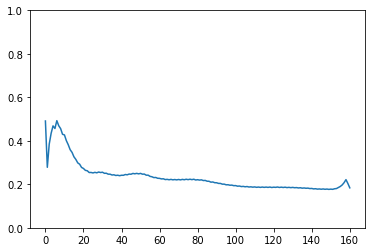

In [10]:
w = a_model.mask_layer.w
b = a_model.mask_layer.b
activation = a_model.mask_layer.activation

ynew = a_model.mask_layer.drop_p# c.VOX1_CLEAN
drop_weight = torch.tensor(ynew).reshape(1, 1, 1, -1).float()
drop_weight = activation(w * drop_weight + b)

plt.plot(drop_weight.squeeze().detach().numpy())
plt.ylim(0,1)
print(drop_weight)
print(ynew)